In [1]:
#Install packages
import math
import copy
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

# Classification with SVM's

## Download the Iris dataset from sklearn

In [2]:
from sklearn.datasets import load_iris

iris_df = load_iris(as_frame=True).frame
iris = load_iris()
X = iris.data
y = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Prepare data for 2d experiments and plots

In [3]:
feature = np.array(iris_df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]])
X = feature
y = iris_df["target"]

## Split your data into a training and test set using train_test_split from sklearn and set stratify=y

In [4]:
from sklearn.model_selection import train_test_split

x_train_2d, x_test_2d, y_train_2d, y_test_2d = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

## You will be grabbing 2 features from the dataset (You can use any of the feature selection methods you learnt in class)
Hint: I used chi-square feature selection because it is easy, fast and gave the same results as recursive feature elimination in previous labs

In [5]:
#Useing chisquare feature_selection to select the best 2 features to use
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_in=2
selector = SelectKBest(chi2, k=k_in).fit(x_train_2d, y_train_2d)
training_taslima = selector.transform(x_train_2d)
testing_taslima = selector.transform(x_test_2d)

### Show which features were selected

In [6]:
import numpy as np

selector.scores_
top_n = np.argsort(selector.scores_)[-k_in:]
print(iris_df.iloc[:, top_n].columns)

Index(['petal width (cm)', 'petal length (cm)'], dtype='object')


## Use StandardScaler to feature scale your data (If you are using chi-squared, you will want to do this after you have selected your features)

In [7]:
#Later I will use these data for 2D activities
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(training_taslima, y_train_2d)
training_set_x_new_2d = scaler.transform(training_taslima)
testing_set_x_new_2d = scaler.transform(testing_taslima)

# Prepare data for 3d experiments and plots

In [8]:
newfeature =  iris_df[iris_df.columns[iris_df.columns.isin(['sepal length (cm)','sepal width (cm)','petal length (cm)'])]]
three_features = newfeature

## Grab the first 3 features in your datsset and change to binary classification problem 
- You will have to make the problem a binary classifiation problem
  - This will be done by grabbing Only labels with 0 or 1. We will be completely ignoring class 2

In [9]:
import copy
y_new_3d = copy.deepcopy(y)
X_new_3d = newfeature[np.logical_or(y==0,y==1)]
y_new_3d = y_new_3d[np.logical_or(y==0,y==1)]
X_new_3d=np.array(X_new_3d)

In [10]:
type(X_new_3d)

numpy.ndarray

In [11]:
X_new_3d.shape

(100, 3)

## Split the data into a training and testing dataset using train_test_split from sklearn and set stratify=y (In this case remember y is your binary version of y which has only 2 labels 0 and 1)

In [12]:
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_new_3d, y_new_3d, test_size=0.25, random_state=0, stratify=y_new_3d)

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=1.0

In [13]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0)
clf = model.fit(training_set_x_new_2d, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [14]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(training_set_x_new_2d)
hinge_loss = hinge_loss(y_train_2d, clf.decision_function(training_set_x_new_2d))
accuracy = accuracy_score(y_train_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.10699609961904019, accuracy: 0.9553571428571429


### Calculate the accuracy and hinge loss on the testing set

In [15]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(testing_set_x_new_2d)
hinge_loss = hinge_loss(y_test_2d, clf.decision_function(testing_set_x_new_2d))
accuracy = accuracy_score(y_test_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.071755462790017, accuracy: 0.9736842105263158


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

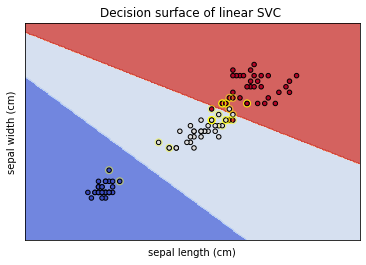

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = training_set_x_new_2d[:, 0], training_set_x_new_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=.5)
ax.set_ylabel(f'{iris_df.iloc[:, 1].name}')
ax.set_xlabel(f'{iris_df.iloc[:, 0].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=1.0

In [17]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1.0)
clf = model.fit(X_train_3d, y_train_3d)

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You should have the plane perfectly seperating 2 classes

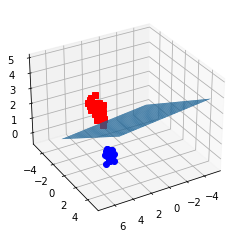

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X_train_3d[y_train_3d==0,0], X_train_3d[y_train_3d==0,1], X_train_3d[y_train_3d==0,2],'ob')
ax.plot3D(X_train_3d[y_train_3d==1,0], X_train_3d[y_train_3d==1,1], X_train_3d[y_train_3d==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

### Get the accuracy and hinge loss of the testing set

In [19]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(X_test_3d)
hinge_loss = hinge_loss(y_test_3d, clf.decision_function(X_test_3d))
accuracy = accuracy_score(y_test_3d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.006642279749546143, accuracy: 1.0


## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=100000

In [20]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=100000)
clf = model.fit(training_set_x_new_2d, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [21]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(training_set_x_new_2d)
hinge_loss = hinge_loss(y_train_2d, clf.decision_function(training_set_x_new_2d))
accuracy = accuracy_score(y_train_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.09202491845064567, accuracy: 0.9642857142857143


### Calculate the accuracy and hinge loss on the testing set

In [22]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(testing_set_x_new_2d)
hinge_loss = hinge_loss(y_test_2d, clf.decision_function(testing_set_x_new_2d))
accuracy = accuracy_score(y_test_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.13481851457120597, accuracy: 0.9473684210526315


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

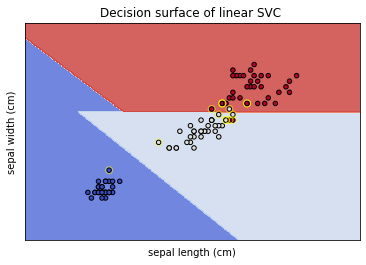

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = training_set_x_new_2d[:, 0], training_set_x_new_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=.5)
ax.set_ylabel(f'{iris_df.iloc[:, 1].name}')
ax.set_xlabel(f'{iris_df.iloc[:, 0].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=100000

In [24]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=100000)
clf = model.fit(X_train_3d, y_train_3d)

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You should have the plane perfectly seperating 2 classes

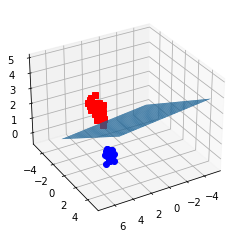

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X_train_3d[y_train_3d==0,0], X_train_3d[y_train_3d==0,1], X_train_3d[y_train_3d==0,2],'ob')
ax.plot3D(X_train_3d[y_train_3d==1,0], X_train_3d[y_train_3d==1,1], X_train_3d[y_train_3d==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

### Get the accuracy and hinge loss of the testing set

In [26]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(X_test_3d)
hinge_loss = hinge_loss(y_test_3d, clf.decision_function(X_test_3d))
accuracy = accuracy_score(y_test_3d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.006642279749546143, accuracy: 1.0


## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="linear", C=0.0001

In [27]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=0.0001)
clf = model.fit(training_set_x_new_2d, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [28]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(training_set_x_new_2d)
hinge_loss = hinge_loss(y_train_2d, clf.decision_function(training_set_x_new_2d))
accuracy = accuracy_score(y_train_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 1.575118860079068, accuracy: 0.3392857142857143


### Calculate the accuracy and hinge loss on the testing set

In [29]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(testing_set_x_new_2d)
hinge_loss = hinge_loss(y_test_2d, clf.decision_function(testing_set_x_new_2d))
accuracy = accuracy_score(y_test_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 1.6311527580574239, accuracy: 0.3157894736842105


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

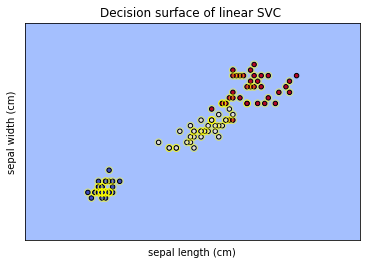

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = training_set_x_new_2d[:, 0], training_set_x_new_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=.5)
ax.set_ylabel(f'{iris_df.iloc[:, 1].name}')
ax.set_xlabel(f'{iris_df.iloc[:, 0].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

## Train, predict and plot svm on 3d prepared data with the following configuration:

- kernel="linear", C=0.0001

In [31]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=0.0001)
clf = model.fit(X_train_3d, y_train_3d)

### Plot 3D graph using binary training data with hyperplane separating the 2 points
    - Hint: You will hot have a plane perfectly seperating the data because it is underfit

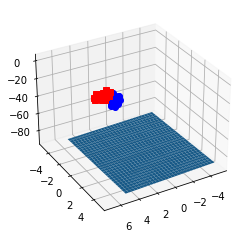

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]

tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.plot3D(X_train_3d[y_train_3d==0,0], X_train_3d[y_train_3d==0,1], X_train_3d[y_train_3d==0,2],'ob')
ax.plot3D(X_train_3d[y_train_3d==1,0], X_train_3d[y_train_3d==1,1], X_train_3d[y_train_3d==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

### Get the accuracy and hinge loss of the testing set

In [33]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(X_test_3d)
hinge_loss = hinge_loss(y_test_3d, clf.decision_function(X_test_3d))
accuracy = accuracy_score(y_test_3d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 1.0220450600009157, accuracy: 0.48


## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="poly", C=1.0, degree=2, coef0=0.0, gamma="scale"

In [34]:
from sklearn.svm import SVC
model = SVC(kernel='poly', C=1.0, degree=2, coef0=0.0, gamma="scale")
clf = model.fit(training_set_x_new_2d, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [35]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(training_set_x_new_2d)
hinge_loss = hinge_loss(y_train_2d, clf.decision_function(training_set_x_new_2d))
accuracy = accuracy_score(y_train_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.381934321235046, accuracy: 0.8125


### Calculate the accuracy and hinge loss on the testing set

In [36]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(testing_set_x_new_2d)
hinge_loss = hinge_loss(y_test_2d, clf.decision_function(testing_set_x_new_2d))
accuracy = accuracy_score(y_test_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.32211937623796044, accuracy: 0.8421052631578947


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

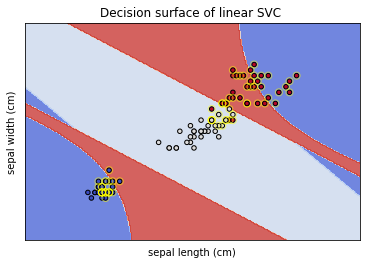

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = training_set_x_new_2d[:, 0], training_set_x_new_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=.5)
ax.set_ylabel(f'{iris_df.iloc[:, 1].name}')
ax.set_xlabel(f'{iris_df.iloc[:, 0].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="poly", C=1.0, degree=3, coef0=0.0, gamma="scale"

In [38]:
from sklearn.svm import SVC
model = SVC(kernel='poly', C=1.0, degree=3, coef0=0.0, gamma="scale")
clf = model.fit(training_set_x_new_2d, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [39]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(training_set_x_new_2d)
hinge_loss = hinge_loss(y_train_2d, clf.decision_function(training_set_x_new_2d))
accuracy = accuracy_score(y_train_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.1318148663394509, accuracy: 0.9375


### Calculate the accuracy and hinge loss on the testing set

In [40]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(testing_set_x_new_2d)
hinge_loss = hinge_loss(y_test_2d, clf.decision_function(testing_set_x_new_2d))
accuracy = accuracy_score(y_test_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.05675145079318143, accuracy: 0.9736842105263158


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

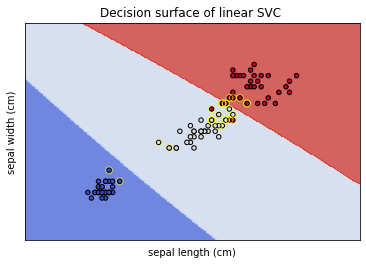

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = training_set_x_new_2d[:, 0], training_set_x_new_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=.5)
ax.set_ylabel(f'{iris_df.iloc[:, 1].name}')
ax.set_xlabel(f'{iris_df.iloc[:, 0].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()

## Train, predict and plot svm on 2d prepared data with the following configuration:

- kernel="rbf", C=1.0, gamma="scale"

In [42]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', C=1.0, gamma="scale")
clf = model.fit(training_set_x_new_2d, y_train_2d)

### Calculate the accuracy and hinge loss on the training set

In [43]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(training_set_x_new_2d)
hinge_loss = hinge_loss(y_train_2d, clf.decision_function(training_set_x_new_2d))
accuracy = accuracy_score(y_train_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.09221400120244325, accuracy: 0.9553571428571429


### Calculate the accuracy and hinge loss on the testing set

In [44]:
from sklearn.metrics import hinge_loss
h_w_x = clf.predict(testing_set_x_new_2d)
hinge_loss = hinge_loss(y_test_2d, clf.decision_function(testing_set_x_new_2d))
accuracy = accuracy_score(y_test_2d, h_w_x, normalize=True)
print(f"hinge_loss: {hinge_loss}, accuracy: {accuracy}")

hinge_loss: 0.05382871503348169, accuracy: 0.9736842105263158


### Plot the decision boundary with each point colored with its groundtruth class in 2D
- encircle your support vectors

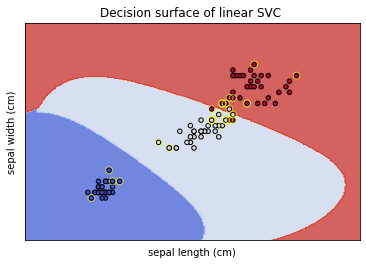

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = training_set_x_new_2d[:, 0], training_set_x_new_2d[:, 1]
xx, yy = make_meshgrid(X0, X1)


plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_2d, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Encircle support vectors
plt.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1], 
            s=50, 
            facecolors='none', 
            edgecolors='yellow', 
            alpha=.5)
ax.set_ylabel(f'{iris_df.iloc[:, 1].name}')
ax.set_xlabel(f'{iris_df.iloc[:, 0].name}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

plt.show()